In [1]:
# Importa os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO 
from pydot import graph_from_dot_data
from time import process_time

C:\Users\erik\anaconda3\envs\estudos_old\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Carrega o datasset
mushrooms = pd.read_csv('mushrooms.csv')
mushcor = mushrooms
print("Valores faltantes:", mushrooms.isnull().values.any())


Valores faltantes: False


In [3]:
print(mushrooms['class'].value_counts())

e    4208
p    3916
Name: class, dtype: int64


In [4]:
mushrooms = df = mushrooms.drop('veil-type', 1)

In [6]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [9]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
print("Clases: ", mushrooms['class'].unique())

Clases:  ['p' 'e']


In [12]:
mushrooms.shape

(8124, 22)

In [13]:
labelencoder=LabelEncoder()

for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])

In [14]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


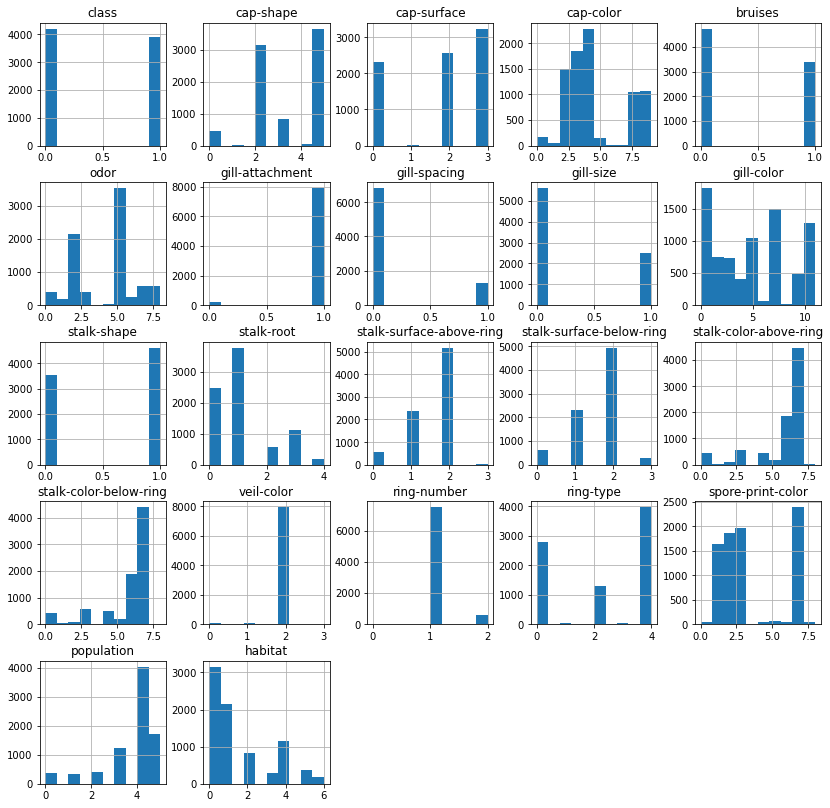

In [15]:
mushrooms.hist(figsize=(14, 14))
plt.show()

In [16]:
mushrooms.groupby('class').size()

class
0    4208
1    3916
dtype: int64

In [17]:
X = mushrooms.iloc[:,1:23]
y = mushrooms.iloc[:, 0]

In [18]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [19]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [20]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [21]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [22]:
mushrooms['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

C:\Users\erik\anaconda3\envs\estudos_old\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

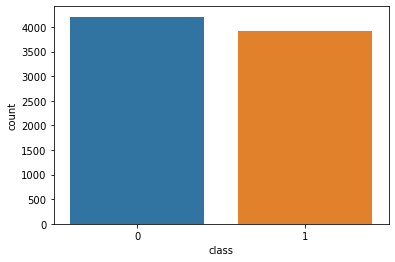

In [23]:
sns.countplot(mushrooms['class'])

In [24]:
# Divisão do dataset: 75% para treino, 25% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
# Número de amostras em cada parte

print("Quantidade de amostras no treino: {0:0.2f}% ".format((len(X_train)/len(mushrooms.index)) * 100))
X_train.shape, y_train.shape

Quantidade de amostras no treino: 75.00% 


((6093, 21), (6093,))

In [27]:
print("Quantidade de amostras no teste: {0:0.2f}%".format((len(X_test)/len(mushrooms.index)) * 100))
X_test.shape, y_test.shape

Quantidade de amostras no teste: 25.00%


((2031, 21), (2031,))

In [28]:
# Proporção de cada classe no treino e teste
print("Treino - Possuem diabetes : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100 * (len(y_train[y_train[:] == 1]) / len(y_train))))
print("Treino - Não possuem diabetes : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100 * (len(y_train[y_train[:] == 0]) / len(y_train))))

print("Teste - Possuem diabetes : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100 * (len(y_test[y_test[:] == 1]) / len(y_test))))
print("Teste - Não possuem diabetes : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100 * (len(y_test[y_test[:] == 0]) / len(y_test))))

Treino - Possuem diabetes : 2925 (48.01%)
Treino - Não possuem diabetes : 3168 (51.99%)
Teste - Possuem diabetes : 991 (48.79%)
Teste - Não possuem diabetes : 1040 (51.21%)


In [29]:
# Implementação, treino, teste do classificador GaussianNB
print("Naive Bayes Gaussian")
nbc =  GaussianNB()
# Inicio da contagem do tempo de processamento - Treino
train_time_GNB = process_time()
nbc.fit(X_train, y_train)
train_elapsed_time_GNB = process_time() - train_time_GNB
# Termino da contagem do tempo de processamento - Treino
print("Tempo gasto no treino (GaussianNB):", train_elapsed_time_GNB)

Naive Bayes Gaussian
Tempo gasto no treino (GaussianNB): 0.03125


In [30]:
# Inicio da contagem do tempo de processamento - Teste
test_time_GNB = process_time()
pred_nbc = nbc.predict(X_test)
test_elapsed_time_GNB = process_time() - test_time_GNB
# Termino da contagem do tempo de processamento - Teste
print("Tempo gasto no teste (GaussianNB):", test_elapsed_time_GNB)

Tempo gasto no teste (GaussianNB): 0.0


In [31]:
# Dados preditos na classificação
print(classification_report(y_test, pred_nbc))
print()
print(confusion_matrix(y_test, pred_nbc))
print("Acurácia holdout:", accuracy_score(y_test, pred_nbc))
print()
# Aplicação da validação cruzada no classificador GaussianNB
nbc_eval = cross_val_score(estimator = nbc, X = X_train, y = y_train, cv = 10)
print("Media da validação cruzada do classificador GaussianNB", nbc_eval.mean())

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031


[[958  82]
 [ 67 924]]
Acurácia holdout: 0.9266371245691778

Media da validação cruzada do classificador GaussianNB 0.9248302019180228


In [32]:
# Calculos para a curva ROC do classificador de Bayes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, pred_nbc)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [33]:
# Implementação, treino, teste do classificador CART
print("Decision Tree")
dtc = DecisionTreeClassifier()
# Inicio da contagem do tempo de processamento - Treino
train_time_DTC = process_time()
dtc.fit(X_train, y_train)
train_elapsed_time_DTC = process_time() - train_time_DTC
# Termino da contagem do tempo de processamento - Treino
print("Tempo gasto no treino (Decision Tree):", train_elapsed_time_DTC)

Decision Tree
Tempo gasto no treino (Decision Tree): 0.015625


In [34]:
# Inicio da contagem do tempo de processamento - Teste
test_time_DTC = process_time()
pred_dtc = dtc.predict(X_test)
# Termino da contagem do tempo de processamento - Teste
test_elapsed_time_DTC = process_time() - test_time_DTC
print("Tempo gasto no teste (Decision Tree):", test_elapsed_time_DTC)

Tempo gasto no teste (Decision Tree): 0.0


In [35]:
print(classification_report(y_test, pred_dtc))

print(confusion_matrix(y_test, pred_dtc))
print("Acurácia holdout:", accuracy_score(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1040    0]
 [   0  991]]
Acurácia holdout: 1.0


In [36]:
# Aplicação da validação cruzada no classificador CART
dtc_eval = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = 10)
print("Media da validação cruzada do classificador CART", dtc_eval.mean())

Media da validação cruzada do classificador CART 1.0


In [37]:
# Exporta a Arvore de Decisão para um arquivo .pdf
dot_data = StringIO() 
export_graphviz(dtc, out_file=dot_data) 
graph = graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("mushroomstree.pdf")

In [41]:
# Calculos para a curva ROC da Arvore de Decisão
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

for i in range(2):
    fpr2[i], tpr2[i], _ = roc_curve(y_test, pred_dtc)
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
print(roc_auc_score(y_test, pred_dtc))

1.0


In [43]:
# Decision Tree
pred_dtc = dtc.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, pred_dtc)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, pred_dtc)

In [44]:
pred_nbc = nbc.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, pred_nbc)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, pred_nbc)

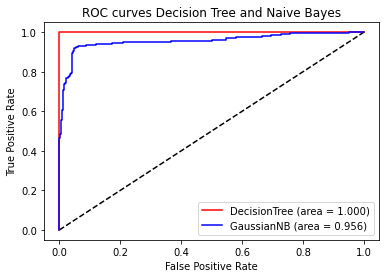

In [45]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Tree, tpr_Tree, color='red', label='DecisionTree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_nb, tpr_nb, color='blue', label='GaussianNB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves Decision Tree and Naive Bayes')
plt.legend(loc='best')
plt.show()

In [49]:
del mushrooms['class']
corr = mushrooms.corr() 
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

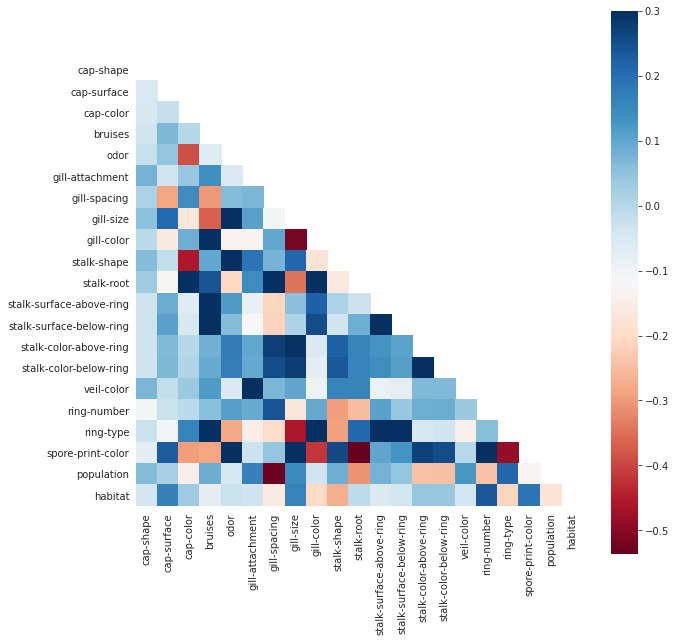

In [50]:
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 10))

    ax = sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, square=True)